## Physics/Math 248 Final Exam.  

You have three hours.  You are encouraged to use any material from the course, such as your own work and class notebooks. You are also free to use standard on-line resources such as Python reference manuals.  You must do all the work on your own, i.e. no consulting with fellow students or with people on-line.  Once you have completed your exam, push your notebook to your bitbucket repository. 

**Final Exam Problem Setup**

We have two billiard balls $A$ and $B$, constrained to move along a frictionless line $x \geq 0$. There is no gravity.  At position $x=0$ is an immovable elastic wall.  Billiard $A$ has mass $m_A$. Billiard $B$ has mass $m_B$.

<img src="F.Q1.Setup.png">

The initial position of billard $A$ is $x=1$. The initial position of billiard $B$ is at $x=2$. 

As the wall is completely elastic, when billiard $A$ collides with the wall, its velocity instantaneously reverses, i.e. $v_A' = - v_A$. 

When billiard $A$ and $B$ collide, the new velocity of billiard $A$ and $B$ are given by:

$$v_A' = \frac{m_A-m_B}{m_A+m_B}v_A + \frac{2m_B}{m_A+m_B}v_B$$
$$v_B' = \frac{m_B-m_A}{m_A+m_B}v_B + \frac{2m_A}{m_A+m_B}v_A$$

Thus provided $m_B > m_A$ billiard $A$ will undergo a sequence of velocity sign changes as it collides with billiard $B$ and the wall, in succession, until billiard $B$ escapes (to the right) at a larger velocity than billiard $A$. 

**Problem 1:**

Write an algorithm that takes as input the initial velocity of billiard $A$, $B$, and the masses
of billiards $A$ and $B$ respectively.  The output will be a pair $(c_1,c_2)$ where $c_1$ is the number of  collisions billiard $A$ makes with the wall, and $c_2$ is the number of collisions billiard $A$ makes with billiard $B$, before $B$ escapes to the right. 
 
<!-- <img src="F.Q1.Context.png" /img> -->

Note, the radius of the billiards is not relevant for any of the problems in this notebook. 

In [56]:
def collision(v_a, v_b, m_a, m_b):
    """
    Calculates a collision result.
    
    v_a: Velocity of a
    v_b: Velocity of b
    m_a: Mass of a
    m_b: Mass of b
    
    Outputs (v_prime_a, v_prime_b)
    """
    # Check args
    v_a, v_b, m_a, m_b = float(v_a), float(v_b), float(m_a), float(m_b)
    
    v_prime_a = (((m_a - m_b) / (m_a + m_b)) * v_a) + (((2 * m_b) / (m_a + m_b)) * v_b)
    v_prime_b = (((m_b - m_a) / (m_a + m_b)) * v_b) + (((2 * m_a) / (m_a + m_b)) * v_a) 
    return v_prime_a, v_prime_b

def prob_1(v_a, v_b, m_a, m_b):
    """
    Calculates a collision sequence.
    
    v_a: Velocity of a
    v_b: Velocity of b
    m_a: Mass of a
    m_b: Mass of b
    
    Outputs (count of hits on wall, count of hits on balls)
    """
    # Check Args.
    v_a, v_b, m_a, m_b = float(v_a), float(v_b), float(m_a), float(m_b)
    
    c_1 = 0 # Number of collisions with wall.
    c_2 = 0 # Collisions with the other ball.
    
    while abs(v_a) > abs(v_b) or v_a == 0 and v_b < 0:
        c_2 += 1
        v_prime_a, v_prime_b = collision(v_a, v_b, m_a, m_b)
#         print v_prime_a, v_prime_b
        if v_prime_a < 0:
            # It collides with the wall and comes back with v*-1
            c_1 += 1
            v_prime_a *= -1
        v_a = v_prime_a
        v_b = v_prime_b
        
    
    return c_1, c_2
    
prob_1(0, -1, 1, 1)

(1, 2)

**Problem 2: **

For $m_A=1$ and $m_B = 10^2, 10^4, 10^6, \cdots $, let the initial velocity of 
billiard $A$ be zero and the initial velocity of billiard $B$ be $-1$. 

Print out: 

    a) The number of collisions of A with the wall. 
    b) The number of collisions of B with A. 
    c) The total number of collisions of all types, i.e. (a)+(b). 

In [80]:
m_a = 1
v_a = 0
v_b = -1

print "{:15} {:15} {:15} {:15}".format("expo", "c_1", "c_2", "c_1 + c_2")
for m_b_expo in [0, 1, 2, 4, 6, 8, 10]:
    c_1, c_2 = prob_1(v_a, v_b, m_a, 10**m_b_expo)
    
    print "{:15} {:15} {:15} {:15}".format(10**m_b_expo, c_1, c_2, c_1 + c_2)

expo            c_1             c_2             c_1 + c_2      
              1               1               2               3
             10               5               5              10
            100              15              16              31
          10000             157             157             314
        1000000            1570            1571            3141
      100000000           15707           15708           31415
    10000000000          157079          157080          314159


You should begin to see a pattern in your answer to Problem 2. 

**Problem 3: **

Infer a function $f(m_B)$ so that the limit

$$\lim_{m_B \to \infty} \frac{coll(m_B)}{f(m_B)} = L$$

exists, with $L \neq 0$.  

$coll(m_B)$ is the sum of the number of collisions between $A$ and $B$, as well as $A$ and the wall, i.e. the answer to 2(c). 

In [105]:
def prob_2(m_b):
    """
    Shows the f(m_b) from above.
    
    m_b: Mass of b
    
    Outputs the f(m_b).
    """
    import math
    #print math.sqrt(m_b)
    return (math.pi * math.sqrt(m_b))

print "{:20} {:20} {:20} {:20}".format("expo", "coll", "f", "L")
for m_b_expo in [0, 1, 2, 4, 6, 8, 10,12]:
    c_1, c_2 = prob_1(v_a, v_b, m_a, 10**m_b_expo)
    f_result = prob_2(10**m_b_expo)
    print "{:20} {:20} {:20} {:20}".format(10**m_b_expo, c_1 + c_2, f_result, (c_1 + c_2) / f_result)

expo                 coll                 f                    L                   
                   1                    3        3.14159265359       0.954929658551
                  10                   10         9.9345882658        1.00658424209
                 100                   31        31.4159265359        0.98676064717
               10000                  314        314.159265359       0.999493042617
             1000000                 3141        3141.59265359       0.999811352503
           100000000                31415        31415.9265359       0.999970507446
         10000000000               314159        314159.265359       0.999999155336
       1000000000000              3141592        3141592.65359       0.999999791956


$$ f(x) = \pi * \sqrt{m_b} $$

**Problem 4: **

To demonstrate how quickly $coll(m_B)/f(m_B)$ converges to $L$, create a plot consisting of:

    1) A horizontal line at height L. 
    2) coll(m_B)/f(m_B) for m_B=1, 10, 10^2, 10^3, 10^4, 10^5, 10^6. 

Perhaps your x-coordinate should be $n$ where $m_B=10^n$.  Make the horizontal line (1) a different colour from (2).

Populating the interactive namespace from numpy and matplotlib


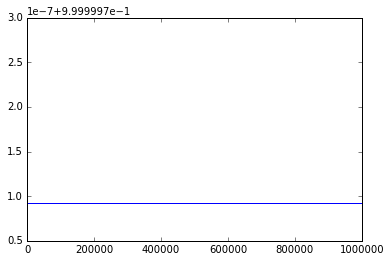

In [125]:
% pylab inline
import matplotlib.pyplot as plt

x_set = [1, 10, 10**2, 10**3, 10**4, 10**5, 10**6]
line = [1 for x in x_set]

plt.plot(x_set, line, color="red")

x_calc = []
for x in x_set:
    c_1, c_2 = prob_1(v_a, v_b, m_a, 10**m_b_expo)
    f_result = prob_2(10**m_b_expo)
    
    x_calc.append((c_1 + c_2) / f_result)

plt.plot(x_set, x_calc, color="blue")

Note because these converge so quickly it appears there is only one line.

**Problem 5:**

Write an algorithm that takes as input any initial masses, positions and initial velocities and outputs a (matplotlib) plot like the one below, which depicts the path both mass $A$ and $B$ take, including all collisions. 

<img src="F.Q1.Context.png" /img>


Populating the interactive namespace from numpy and matplotlib


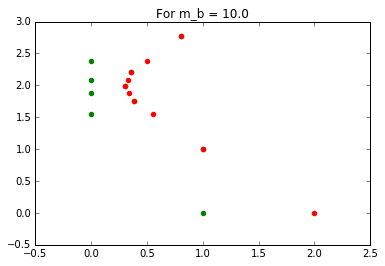

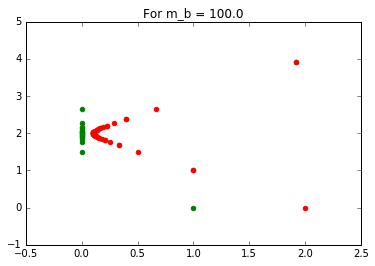

In [40]:
% pylab inline 
def prob_5(v_a, v_b, m_a, m_b, x_a, x_b):
    """
    Calculates a collision result.
    
    v_a: Velocity of a
    v_b: Velocity of b
    m_a: Mass of a
    m_b: Mass of b
    x_a: The x position of a
    x_b: The x position of b
    
    Outputs a plot.
    """
    v_a, v_b, m_a, m_b, x_a, x_b = float(v_a), float(v_b), float(m_a), float(m_b), float(x_a), float(x_b)
    import matplotlib.pyplot as plt
    import math
    
    x_points = [(x_a, x_b)] # (x_a, x_b)
    times = [0]
    time_so_far = 0.0
    
    while abs(v_a) > abs(v_b) or v_a == 0 and v_b < 0:
        #print v_a, v_b
        till_next_ball_hit = (x_b - x_a) / (v_b - v_a)
        
        till_next_wall_hit = float("inf")
        if v_a != 0 and x_a != 0:
            till_next_wall_hit = x_a / (v_a)
        
        till_next_collision = 0
        type_of_collision = None
        
        if till_next_wall_hit < till_next_ball_hit:
            till_next_collision = till_next_wall_hit
            type_of_collision = "wall"
        else:
            till_next_collision = till_next_ball_hit
            type_of_collision = "ball"
        
        till_next_collision = abs(till_next_collision)
        time_so_far += till_next_collision
        
        x_a += (v_a * till_next_collision)
        x_b += (v_b * till_next_collision)
        
        if type_of_collision == "wall":
            v_a *= -1
            #print "wall hit", time_so_far, v_a, v_b
        else:
            v_a_new = (((m_a - m_b) / (m_a + m_b)) * v_a) + (((2 * m_b) / (m_a + m_b)) * v_b)
            v_b_new = (((m_b - m_a) / (m_a + m_b)) * v_b) + (((2 * m_a) / (m_a + m_b)) * v_a) 
            v_a, v_b = v_a_new, v_b_new
            #print "ball hit", time_so_far, v_a, v_b
            
        #print(x_a, x_b)
        x_points.append((x_a, x_b))
        times.append(time_so_far)
#         if len(times) == 100:
#             break
    plt.title("For m_b = {}".format(m_b))
    plt.scatter([a for a, b in x_points], times, color="green")
    plt.scatter([b for a, b in x_points], times, color="red")
    plt.show()

prob_5(0, -1, 1, 10, 1, 2)
prob_5(0, -1, 1, 10**2, 1, 2)
    
    
    